# Анализ игрового бизнеса в части продаж игр, жанров и платформ для планирования рекламной кампании потенциально популярного продукта.

**План выполнения проекта:**  
Шаг 1. Открыть файл с данными и изучить общую информацию.  
Шаг 2. Подготовить данные  
Замените названия столбцов (привести к нижнему регистру);  
Преобразовать данные в нужные типы;  
Обработать пропуски при необходимости.  
Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.  
Шаг 3. Провести исследовательский анализ данных  
Посмотреть сколько игр выпускалось в разные годы.  
Посмотреть как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.  
Взять данные за соответствующий актуальный период, который поможет построить прогноз на 2017 год.  
Данные за предыдущие годы не учитываем.  
Понять платформы лидируют по продажам, растут или падают, выбрать несколько потенциально прибыльных платформ.  
Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.  
Посмотреть как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.  
Соотнести выводы с продажами игр на других платформах.  
Посмотреть на общее распределение игр по жанрам.  
Шаг 4. Составить портрет пользователя каждого региона  
Определить для пользователя каждого региона (NA, EU, JP):  
Самые популярные платформы (топ-5).  
Самые популярные жанры (топ-5).  
Оценить влияние рейтинга ESRB на продажи в отдельном регионе?  
Шаг 5. Проверить гипотезы.  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
Самостоятельно определить пороговое значение alpha.  
Шаг 6. Написать общий вывод.

### Описание проекта
Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  

**Основная задача:  
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**  

### Данные
Перед нами данные продаж и нужно отработать принцип работы с данными.  
В наборе данных есть классификация ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».  
**Описание данных:**  
`Name` — название игры;  
`Platform` — платформа;  
`Year_of_Release` — год выпуска;  
`Genre` — жанр игры;  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий);  
`EU_sales` — продажи в Европе (миллионы проданных копий);  
`JP_sales` — продажи в Японии (миллионы проданных копий);  
`Other_sales` — продажи в других странах (миллионы проданных копий);  
`Critic_Score` — оценка критиков (максимум 100);  
`User_Score` — оценка пользователей (максимум 10);  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

### Откроем файл и изучим общую информацию

In [1]:
# загрузим необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from plotly import graph_objects as go

In [2]:
# запишем информацию в датафрейм
df = pd.read_csv('/datasets/games.csv')

In [3]:
# выведем первые 5 строк датафрейма
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# смотрим информацию о датафрейме
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Для удобства и корректности обработки данных необходимо привести к нижнему регистру наименования столбцов и заменить на числовой тип значения столбцов `year_of_release` и `user_score`.

### Подготовка данных к анализу

In [5]:
# приведем названия столбцов к строчным символам
df.columns = df.columns.str.lower()

In [6]:
# tbd запишем как пропущенное значение
df.loc[df['user_score'] == 'tbd', 'user_score'] = 'Nan'

In [7]:
# преобразуем типы данных в датафрейме
df['year_of_release'] = df['year_of_release'].astype('Int64') # год выпуска преобразуем в целые числа
df['user_score'] = df['user_score'].astype(float) # оценку пользователей преобразуем в числовой тип

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [9]:
# проверяем на наличие явных дубликатов
print('Явных дубликатов:', df.duplicated(subset = ['name', 'platform', 'year_of_release']).sum())

Явных дубликатов: 2


In [10]:
# удалим найденные дубликаты
df = df.drop_duplicates(subset = ['name', 'platform', 'year_of_release'])

In [11]:
print(df.isna().sum()) # ищем пропущенные значения
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm') # выводим % пропусков

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64


,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


В столбце **name** 1 пропуска, это меньше 1%. Эти позиции можно удалить, они не будут оказывать существенное влияние на анализ.  
В столбце **year_of_release** 2% пропусков. Эти позиции так же можно удалить, они не будут оказывать существенное влияние на анализ.  
В столбце **critic_score** 51% пропусков, в столбце **user_score** 55% пропусков. С этими данными нужно поработать.  
В столбце **rating** 40% пропусков. Заполнить эти пропущенные значения не представляется возможным.

In [12]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

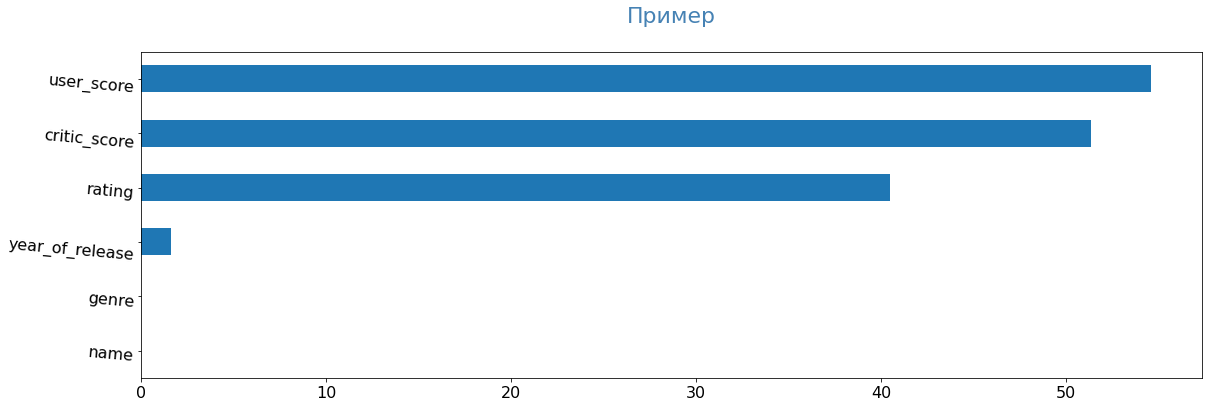

In [13]:
pass_value_barh(df)

In [14]:
# удаляем пропущенные значения в столбцах name и year_of_release
df = df.dropna(subset = ['name', 'year_of_release'])

In [15]:
# заполним пропущенные значения по столбцу critic_score как медиану по name
for i in df['name'].unique():
    df.loc[(df['name'] == i) & (df['critic_score'].isna()), 'critic_score'] = \
    df.loc[(df['name'] == i), 'critic_score'].median()

In [16]:
# заполним пропущенные значения по столбцу user_score как медиану по name
for i in df['name'].unique():
    df.loc[(df['name'] == i) & (df['user_score'].isna()), 'user_score'] = \
    df.loc[(df['name'] == i), 'user_score'].median()

In [17]:
# проверим результат
print(df.isna().sum()) # ищем пропущенные значения
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm') # выводим % пропусков

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7522
user_score         7920
rating             6676
dtype: int64


,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,46.000000
user_score,48.000000


Часть пропущенных значений удалось заполнить

In [18]:
# посчитаем суммарные продажи по регионам и записываем в отдельный столбец
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [20]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     8921 non-null   float64
 9   user_score       8523 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


### Исследовательский анализ данных

#### Статистика выпуска игр по годам

,Год выпуска,Количество
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


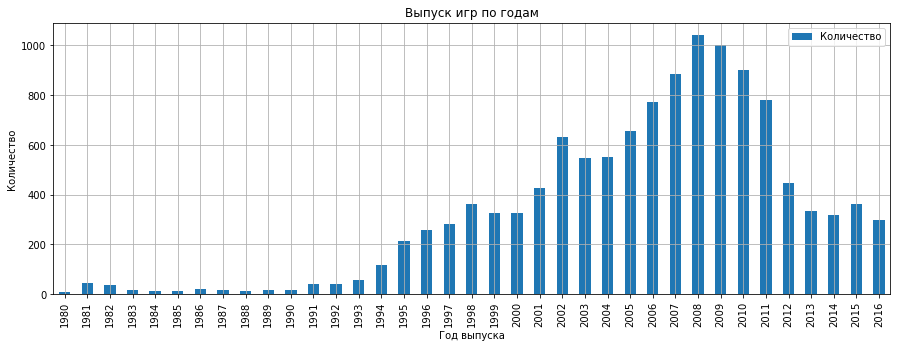

In [21]:
# Cмотрим сколько игр выпускалось в разные годы
year_of_release_name = df.groupby('year_of_release')['name'].nunique().reset_index()
year_of_release_name.columns = ['Год выпуска', 'Количество']
year_of_release_name.plot(kind='bar', x='Год выпуска', figsize = (15, 5), \
                          grid = True,\
                          title='Выпуск игр по годам', \
                          legend = True, \
                         ylabel = 'Количество')
display(year_of_release_name)

#### Платформы с максимальными продажами

In [22]:
# выберем платформы с максимальными продажами
display(df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by = 'total_sales', ascending = False).head(10))

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Оставим шесть платформ с наибольшими продажами: **PS2, X360, PS3, Wii, DS, PS**

#### Динамика продаж по платформам

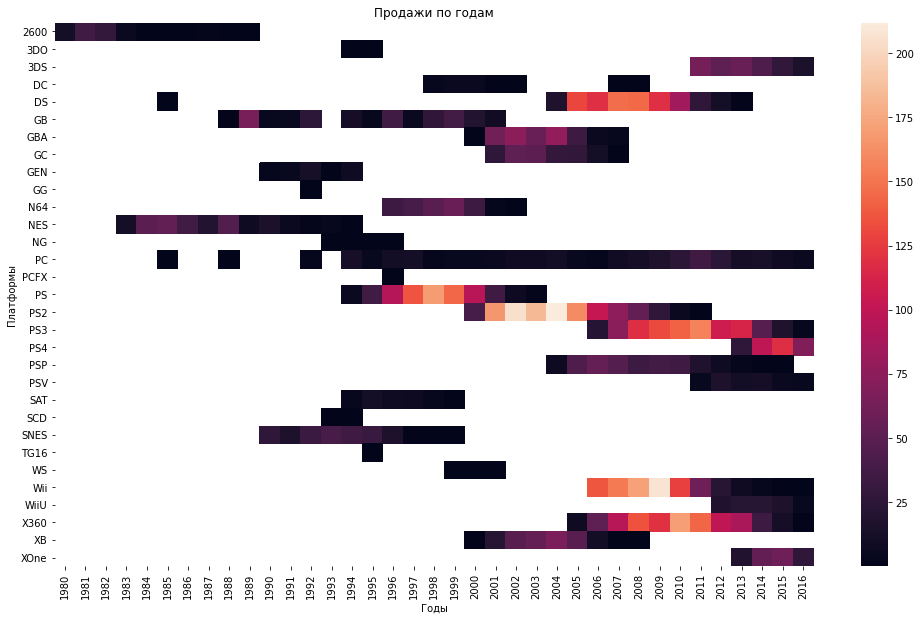

In [23]:
# посмотрим на динамику продаж по всем платформам
total_sales_platforms = df.pivot_table(index='platform', \
                                       columns='year_of_release',\
                                       values='total_sales',\
                                       aggfunc='sum')
plt.figure(figsize=(17,10))
sns.heatmap(total_sales_platforms)
plt.title('Продажи по годам')
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()

К уже отобранным можно добавить PC как долгожителя.

In [24]:
best_sales_platforms = df.query('platform == "PS2" or  \
                                 platform == "X360" or \
                                 platform == "PS3" or  \
                                 platform == "Wii" or  \
                                 platform == "DS" or   \
                                 platform == "PS" or\
                                 platform == "PC"')

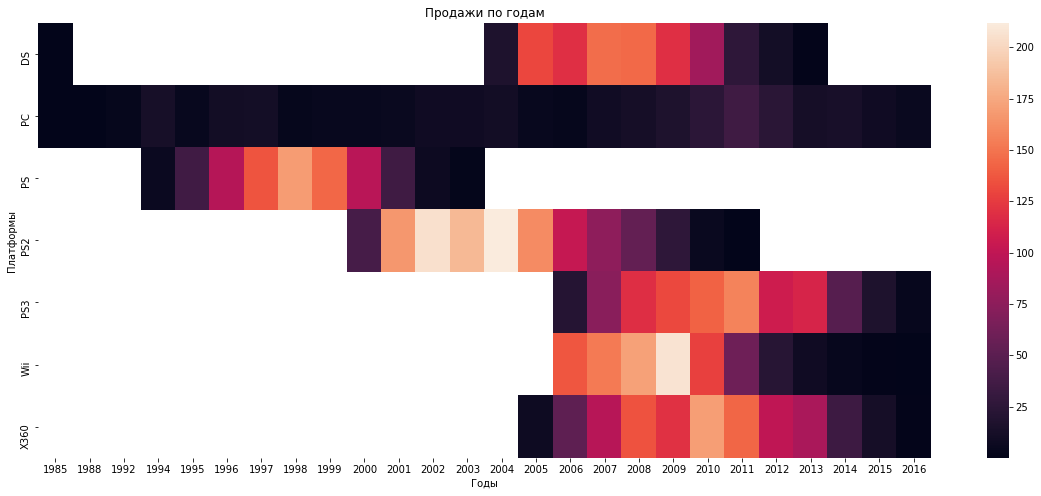

In [25]:
# посмотрим как меняются продажи по выбранным платформам по годам
sales_platforms_year = best_sales_platforms.pivot_table(index='platform', \
                                                        columns='year_of_release',\
                                                        values='total_sales',\
                                                        aggfunc='sum')
plt.figure(figsize=(20,8))
sns.heatmap(sales_platforms_year)
plt.title('Продажи по годам')
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()

Время "жизни" платформы около 10-12 лет, новые платформы выходят через 6 лет. Тем не менее PC уже существует более 20 лет.

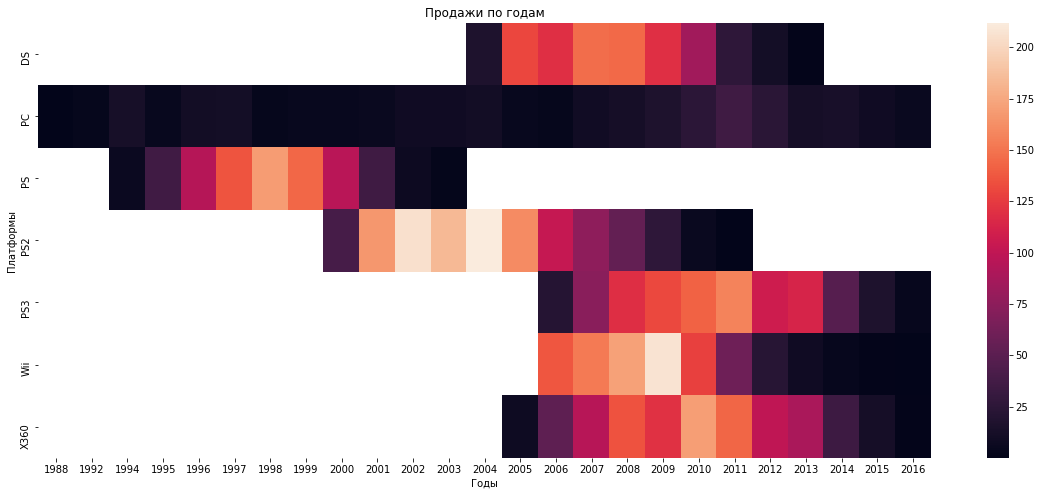

In [26]:
# на графике виден выброс - 1985 год. Удаляем аномалию.
best_sales_platforms = best_sales_platforms[best_sales_platforms['year_of_release'] > 1985]
sales_platforms_year = best_sales_platforms.pivot_table(index='platform', \
                                                        columns='year_of_release',\
                                                        values='total_sales',\
                                                        aggfunc='sum')
plt.figure(figsize=(20,8))
sns.heatmap(sales_platforms_year)
plt.title('Продажи по годам')
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()

**Для дальнейшего анализа возьмем период с 2014 года.**

In [27]:
# выделим данные с этими годами
df_14_16 = df.query('year_of_release in [2014, 2015, 2016]')
df_14_16

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


#### Динамика продаж по годам

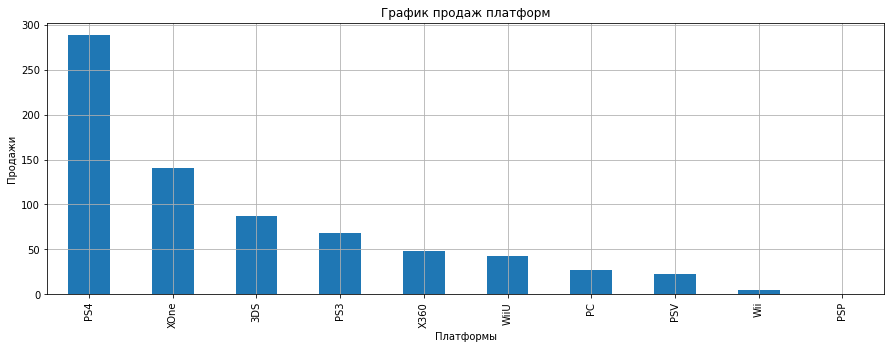

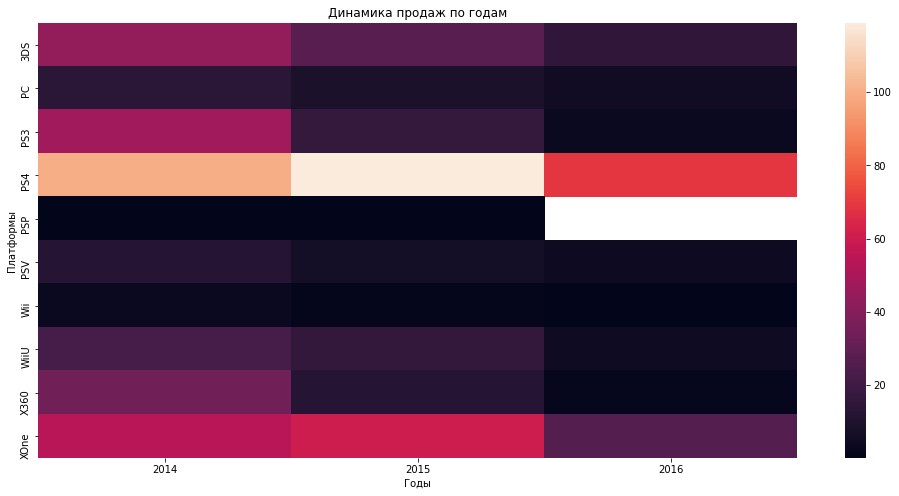

In [28]:
# выводим платформы в порядке убывания продаж
df_14_16.groupby('platform')['total_sales'].sum().sort_values(ascending = False).plot(figsize=(15,5), \
                                                                                      xlabel = 'Платформы',\
                                                                                      ylabel = 'Продажи', \
                                                                                      kind="bar", \
                                                                                      grid = True, \
                                                                                      title='График продаж платформ')
plt.show()
# смотрим динамику продаж по годам
sales_platforms_14_16 = df_14_16.pivot_table(index = 'platform', \
                                             columns = 'year_of_release', \
                                             values = 'total_sales', \
                                             aggfunc = 'sum')
plt.figure(figsize=(17,8))
sns.heatmap(sales_platforms_14_16)
plt.title('Динамика продаж по годам')
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()

Платформа PSP в 2016 году прекратила свое существование. На фоне 2014 - 2015 года динамики роста нет ни у одной платформы, все платформы в спаде. Можно предположить, что медленнее всего будут падать продажи на PS4, XOne, 3DS, а так же PC, которая существует более 20 лет.

Выберем платформы для дальнейшего анализа, которые продаются в 2016 году. Это будут: 3DS, PC, PS3, PS4, PSV, Wii, WiiU, X360 и XOne. 

#### Строим диаграмму размаха

In [29]:
# выполним срез по этим платформам по выбранному периоду
best_platforms = df_14_16.query('platform in ["3DS", "PC", "PS3", "PS4", "PSV", "Wii", "WiiU", "X360", "XOne"]')
best_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


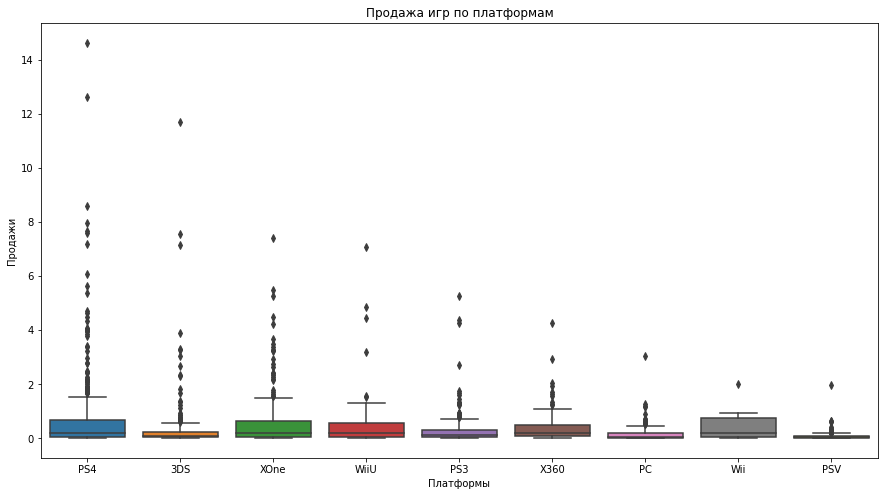

In [30]:
# построим ящик с усами для получившегося датафрейма
plt.figure(figsize=(15,8))
#plt.ylim(0,3)
sns.boxplot(x='platform',y='total_sales',data=best_platforms)
plt.title('Продажа игр по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()


По диаграмме можно заметить, что присутствует достаточное количество выбросов практически по каждой платформе.  
Медиана ближе к 25 процентилю и примерно одинакова по всем платформам.

#### Зависимость продаж от оценки критиков

0.388

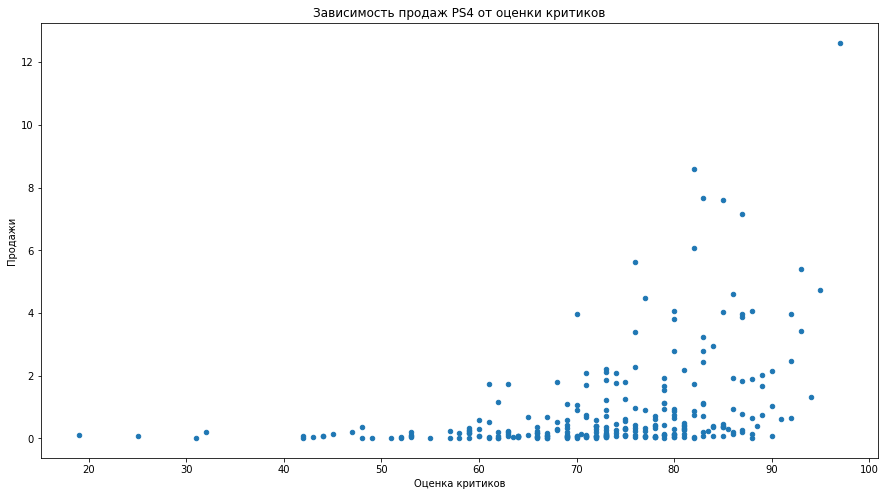

In [31]:
# возьмем платформу PS4 и посмотрим как влияют на продажи отзывы критиков
best_platforms.query('platform == "PS4"').plot(kind='scatter', \
                                               x='critic_score',\
                                               y='total_sales',\
                                               figsize=(15,8), \
                                               xlabel = 'Оценка критиков',\
                                               ylabel = 'Продажи',\
                                               title = 'Зависимость продаж PS4 от оценки критиков')
ps4_cor = best_platforms.query('platform == "PS4"')
ps4_cor['total_sales'].corr(ps4_cor['critic_score']).round(3)

Зависимость небольшая видна. Чем выше оценка критика, тем выше продажи.

0.318

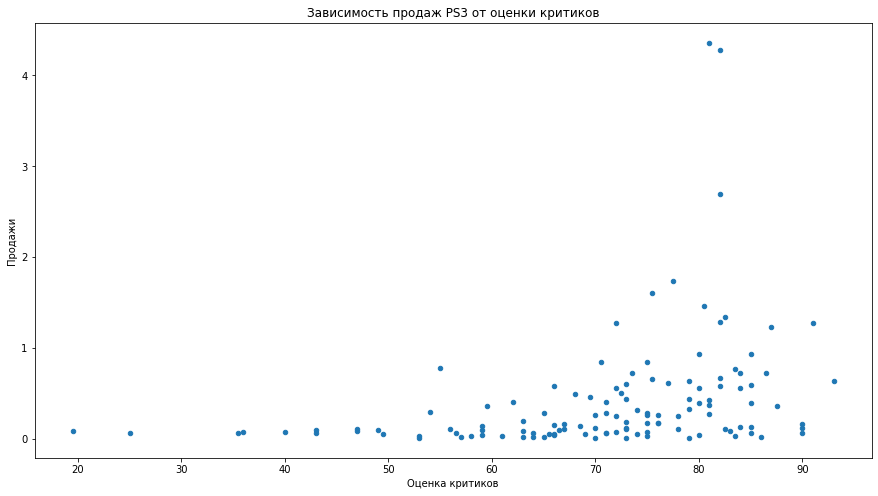

In [32]:
# возьмем платформу PS3 и посмотрим как влияют на продажи отзывы критиков
best_platforms.query('platform == "PS3"').plot(kind='scatter', \
                                               x='critic_score',\
                                               y='total_sales',\
                                               figsize=(15,8), \
                                               xlabel = 'Оценка критиков',\
                                               ylabel = 'Продажи',\
                                               title = 'Зависимость продаж PS3 от оценки критиков')
ps4_cor = best_platforms.query('platform == "PS3"')
ps4_cor['total_sales'].corr(ps4_cor['critic_score']).round(3)

Зависимость практически аналогична PS4.

0.381

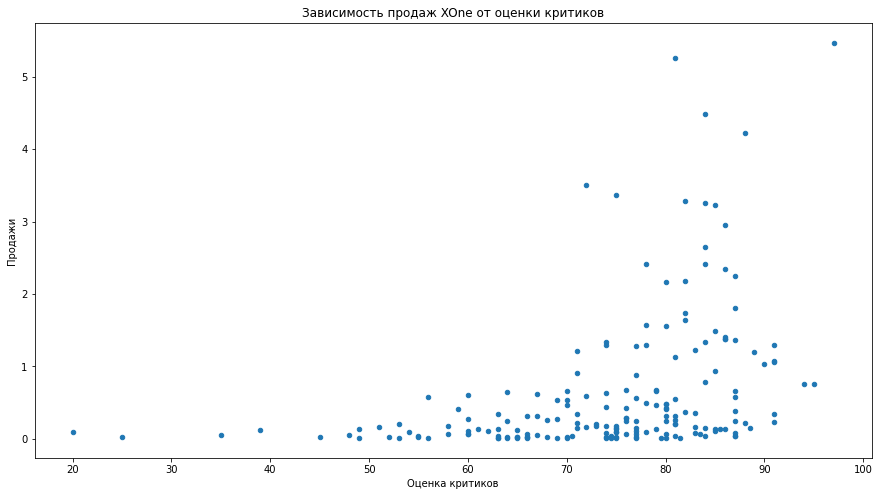

In [33]:
# возьмем платформу XOne и посмотрим как влияют на продажи отзывы критиков
best_platforms.query('platform == "XOne"').plot(kind='scatter', \
                                               x='critic_score',\
                                               y='total_sales',\
                                               figsize=(15,8), \
                                               xlabel = 'Оценка критиков',\
                                               ylabel = 'Продажи',\
                                               title = 'Зависимость продаж XOne от оценки критиков')
ps4_cor = best_platforms.query('platform == "XOne"')
ps4_cor['total_sales'].corr(ps4_cor['critic_score']).round(3)

У всех трех платформ зависимость примерно одинакова. Незначительная зависимость наблюдается.

#### Зависимость продаж от оценки пользователей

-0.095

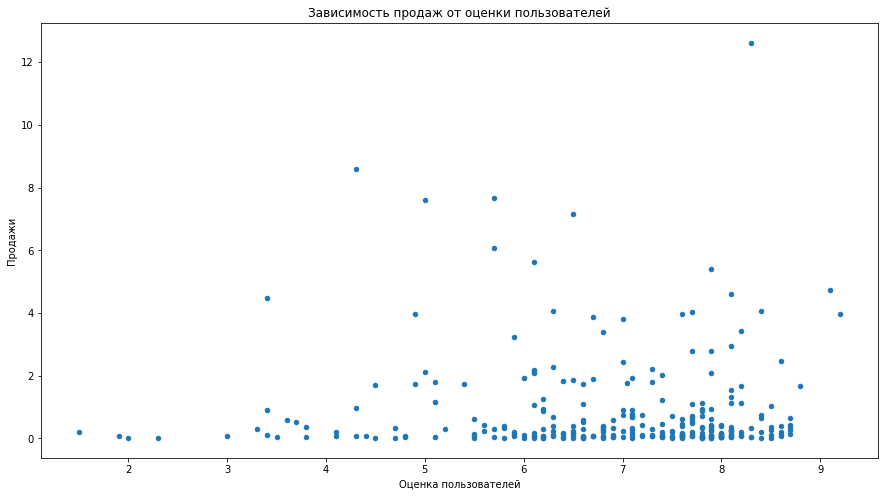

In [34]:
# возьмем платформу PS4 и посмотрим как влияют на продажи отзывы пользователей
best_platforms.query('platform == "PS4"').plot(kind='scatter',\
                                               x='user_score',\
                                               y='total_sales',\
                                               figsize=(15,8),\
                                               xlabel = 'Оценка пользователей',\
                                               ylabel = 'Продажи',\
                                               title = 'Зависимость продаж от оценки пользователей')
ps4_cor['total_sales'].corr(ps4_cor['user_score']).round(3)

Зависимость не наблюдается

-0.095

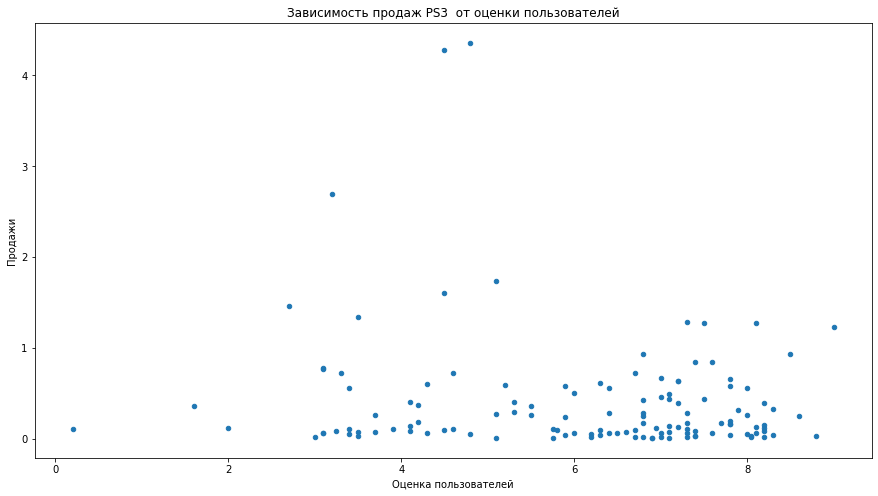

In [35]:
# возьмем платформу PS3 и посмотрим как влияют на продажи отзывы пользователей
best_platforms.query('platform == "PS3"').plot(kind='scatter',\
                                               x='user_score',\
                                               y='total_sales',\
                                               figsize=(15,8),\
                                               xlabel = 'Оценка пользователей',\
                                               ylabel = 'Продажи',\
                                               title = 'Зависимость продаж PS3  от оценки пользователей')
ps4_cor['total_sales'].corr(ps4_cor['user_score']).round(3)

Зависимость не наблюдается

-0.095

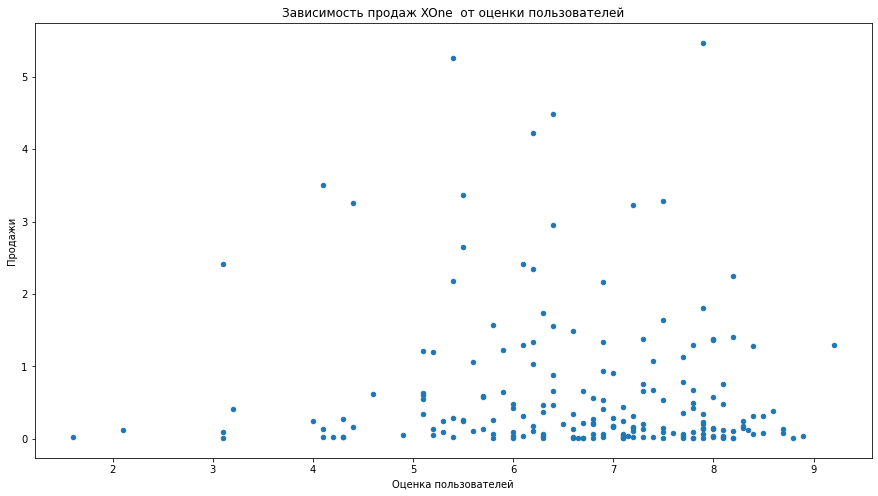

In [36]:
# возьмем платформу XOne и посмотрим как влияют на продажи отзывы пользователей
best_platforms.query('platform == "XOne"').plot(kind='scatter',\
                                               x='user_score',\
                                               y='total_sales',\
                                               figsize=(15,8),\
                                               xlabel = 'Оценка пользователей',\
                                               ylabel = 'Продажи',\
                                               title = 'Зависимость продаж XOne  от оценки пользователей')
ps4_cor['total_sales'].corr(ps4_cor['user_score']).round(3)

По всем трем платформам зависимость продаж от оценки пользователей не наблюдается.

#### Продажи игр по жанрам

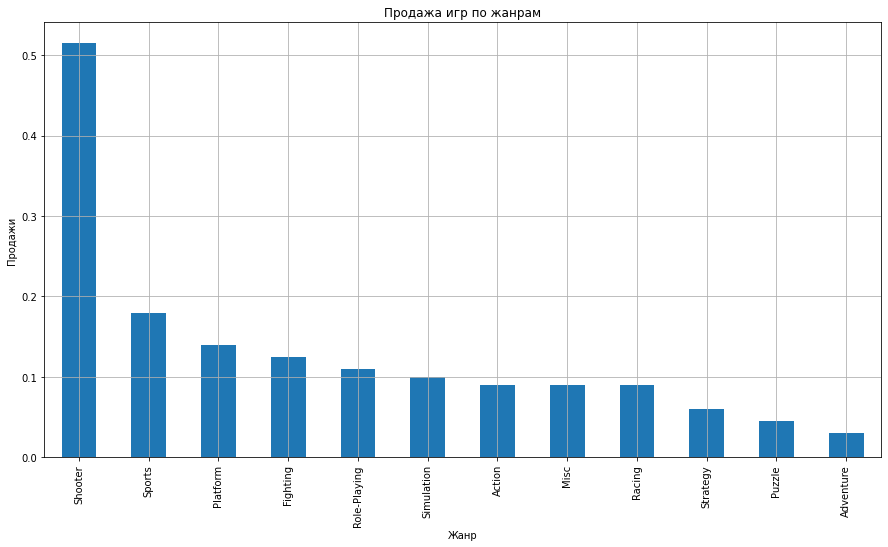

In [37]:
#посмотрим на общее распределение игр по жанрам
profit_genre=df_14_16.groupby('genre')['total_sales'].median().sort_values(ascending=False) # выделим медиану
profit_genre.plot(y='genre',grid=True,figsize=(15,8),kind='bar')
plt.title('Продажа игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

 Самым прибыльным жанром является Schooter

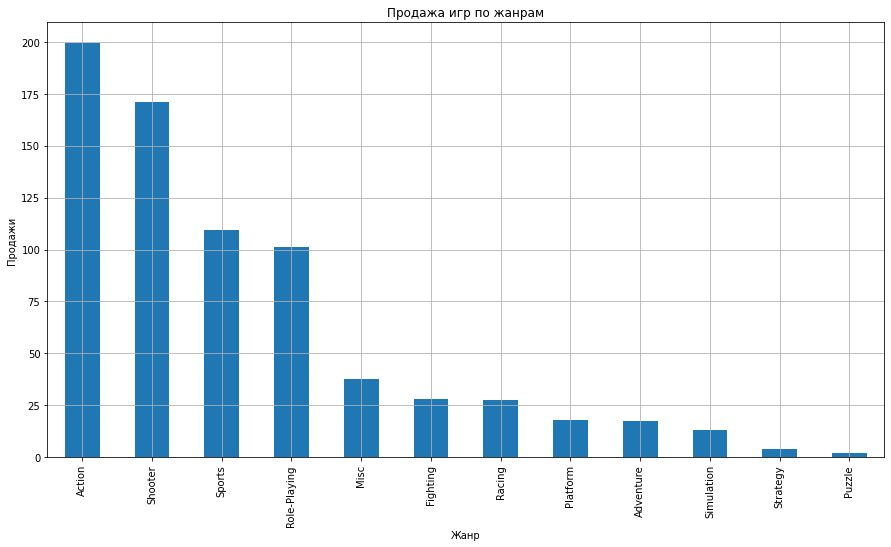

In [38]:
#посмотрим на общее распределение игр по жанрам
profit_genre=df_14_16.groupby('genre')['total_sales'].sum().sort_values(ascending=False) # выделим сумму
profit_genre.plot(y='genre',grid=True,figsize=(15,8),kind='bar')
plt.title('Продажа игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

Самым продаваемым жанром является жанр Action, видимо сказывается невысокая цена.  
Schuter, несмотря на высокую медианную стоимость второй по полулярности.

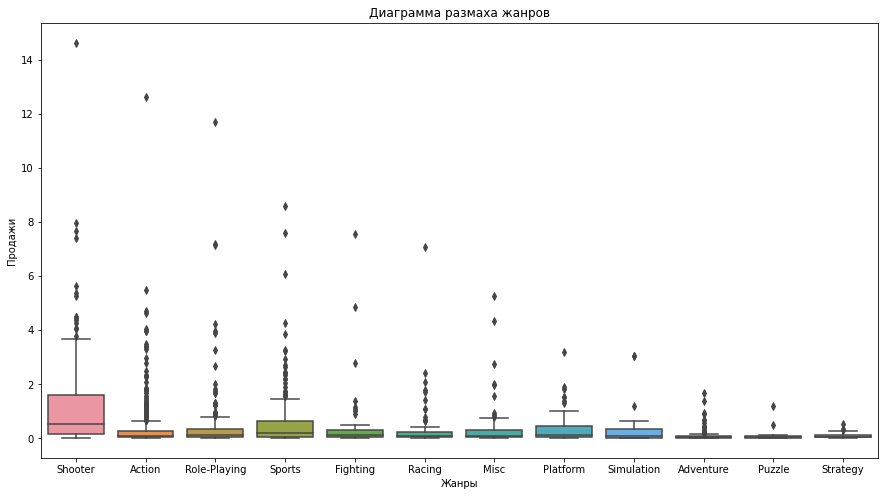

In [39]:
# построим диаграмму размаха для жанров
plt.figure(figsize=(15,8))
#plt.ylim(0,4)
sns.boxplot(x='genre',y='total_sales',data=df_14_16)
plt.title('Диаграмма размаха жанров')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

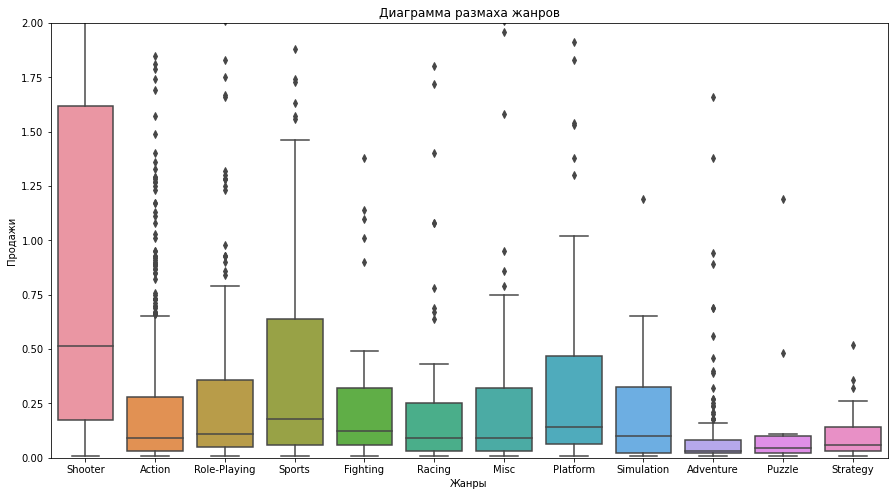

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

In [40]:
# построим диаграмму размаха для жанров
plt.figure(figsize=(15,8))
plt.ylim(0,2)
sns.boxplot(x='genre',y='total_sales',data=df_14_16)
plt.title('Диаграмма размаха жанров')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()
profit_genre

Наивысшая медиана у жанра Shooter, с более чем двухкратным отрывом от Sports

### Составим портрет пользователя каждого региона

#### Самые популярные платформы (топ-5)

In [41]:
# платформы в Северной Америке
NA_sales = df_14_16.pivot_table(index = 'platform',\
                                values='na_sales',\
                                aggfunc=('sum')).sort_values(by='na_sales',ascending=False).reset_index()
NA_sales.loc[NA_sales['na_sales'] < NA_sales['na_sales'][4], 'platform'] = 'other'
NA_sales = NA_sales.pivot_table(index = 'platform',\
                                values='na_sales',\
                                aggfunc=('sum')).sort_values(by='na_sales',ascending=False)#.reset_index()
NA_sales['%'] = (NA_sales['na_sales']/(NA_sales['na_sales'].sum())*100).round(2)
NA_sales = NA_sales.reset_index()
NA_sales

,platform,na_sales,%
0,PS4,98.61,34.71
1,XOne,81.27,28.61
2,other,31.19,10.98
3,X360,28.30,9.96
4,3DS,22.64,7.97
5,PS3,22.05,7.76


Для Северной Америки более 60% рынка занимают продажи PS4 (34,71%) и XOne (28,61%).

In [42]:
# платформы в Европе
EU_sales = df_14_16.pivot_table(index = 'platform',\
                                values='eu_sales',\
                                aggfunc=('sum')).sort_values(by='eu_sales',ascending=False).reset_index()
EU_sales.loc[EU_sales['eu_sales'] < EU_sales['eu_sales'][4], 'platform'] = 'other'
EU_sales = EU_sales.pivot_table(index = 'platform',\
                                values='eu_sales',\
                                aggfunc=('sum')).sort_values(by='eu_sales',ascending=False)
EU_sales['%'] = (EU_sales['eu_sales']/(EU_sales['eu_sales'].sum())*100).round(2)
EU_sales = EU_sales.reset_index()
EU_sales

,platform,eu_sales,%
0,PS4,130.04,48.04
1,XOne,46.25,17.09
2,other,34.76,12.84
3,PS3,25.54,9.44
4,PC,17.97,6.64
5,3DS,16.12,5.96


В Европе 48,04 % рынка занимает PS4. 

In [43]:
# платформы в Японии
JP_sales = df_14_16.pivot_table(index = 'platform',\
                                values='jp_sales',\
                                aggfunc=('sum')).sort_values(by='jp_sales',ascending=False).reset_index()
JP_sales.loc[JP_sales['jp_sales'] < JP_sales['jp_sales'][4], 'platform'] = 'other'
JP_sales = JP_sales.pivot_table(index = 'platform',\
                                values='jp_sales',\
                                aggfunc=('sum')).sort_values(by='jp_sales',ascending=False)
JP_sales['%'] = (JP_sales['jp_sales']/(JP_sales['jp_sales'].sum())*100).round(2)
JP_sales = JP_sales.reset_index()
JP_sales

,platform,jp_sales,%
0,3DS,44.24,47.52
1,PS4,15.02,16.13
2,PSV,14.54,15.62
3,PS3,11.22,12.05
4,WiiU,7.31,7.85
5,other,0.76,0.82


Жители Японии предпочитают собственный продукт, 47,52% рынка занимает 3DS.

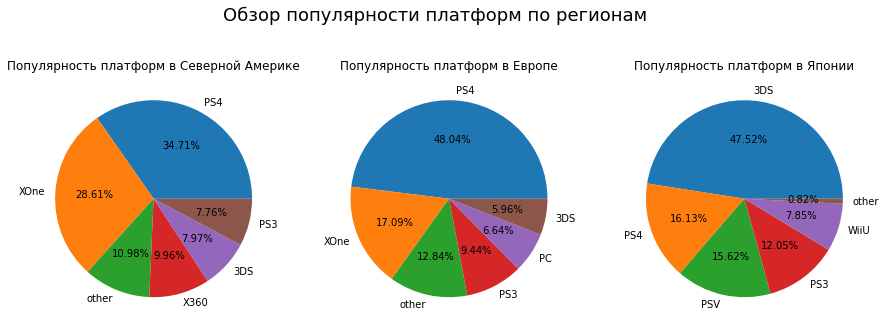

In [44]:
# построим диаграммы для визуализации полученных данных
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
plt.suptitle('Обзор популярности платформ по регионам', fontsize=18, y= 0.68)
ax[0].set_title('Популярность платформ в Северной Америке')
ax[0].pie(NA_sales['na_sales'], labels = NA_sales['platform'], autopct='%1.2f%%')
ax[1].set_title('Популярность платформ в Европе')
ax[1].pie(EU_sales['eu_sales'], labels = EU_sales['platform'], autopct='%1.2f%%')
ax[2].set_title('Популярность платформ в Японии')
ax[2].pie(JP_sales['jp_sales'], labels = JP_sales['platform'], autopct='%1.2f%%')
plt.show()

#### Самые популярные жанры (топ-5)

In [46]:
# Популярные жанры в Северной Америке
genre_NA_sales = df_14_16.pivot_table(index = 'genre',\
                                      values='na_sales',\
                                      aggfunc=('sum')).sort_values(by='na_sales',ascending=False).reset_index()#.head(5)
genre_NA_sales.loc[genre_NA_sales['na_sales'] < genre_NA_sales['na_sales'][4], 'genre'] = 'other'
genre_NA_sales = genre_NA_sales.pivot_table(index = 'genre',\
                                      values='na_sales',\
                                      aggfunc=('sum')).sort_values(by='na_sales',ascending=False)#.head(5)
genre_NA_sales['%'] = (genre_NA_sales['na_sales']/(genre_NA_sales['na_sales'].sum())*100).round(2)
genre_NA_sales = genre_NA_sales.reset_index()
genre_NA_sales

,genre,na_sales,%
0,Shooter,79.02,27.82
1,Action,72.53,25.53
2,Sports,46.13,16.24
3,other,37.86,13.33
4,Role-Playing,33.47,11.78
5,Misc,15.05,5.30


In [47]:
# Популярные жанры в Европе
genre_EU_sales = df_14_16.pivot_table(index = 'genre',\
                                      values='eu_sales',\
                                      aggfunc=('sum')).sort_values(by='eu_sales',ascending=False).reset_index()#.head(5)
genre_EU_sales.loc[genre_EU_sales['eu_sales'] < genre_EU_sales['eu_sales'][4], 'genre'] = 'other' #13
genre_EU_sales = genre_EU_sales.pivot_table(index = 'genre',\
                                      values='eu_sales',\
                                      aggfunc=('sum')).sort_values(by='eu_sales',ascending=False)#.head(5)
genre_EU_sales['%'] = (genre_EU_sales['eu_sales']/(genre_EU_sales['eu_sales'].sum())*100).round(2)
genre_EU_sales = genre_EU_sales.reset_index()
genre_EU_sales

,genre,eu_sales,%
0,Action,74.68,27.59
1,Shooter,65.52,24.21
2,Sports,45.73,16.89
3,other,42.45,15.68
4,Role-Playing,28.17,10.41
5,Racing,14.13,5.22


In [48]:
# Популярные жанры в Японии
genre_JP_sales = df_14_16.pivot_table(index = 'genre',\
                                      values='jp_sales',\
                                      aggfunc=('sum')).sort_values(by='jp_sales',ascending=False).reset_index()#.head(5)
genre_JP_sales.loc[genre_JP_sales['jp_sales'] < genre_JP_sales['jp_sales'][4], 'genre'] = 'other' #4
genre_JP_sales = genre_JP_sales.pivot_table(index = 'genre',\
                                      values='jp_sales',\
                                      aggfunc=('sum')).sort_values(by='jp_sales',ascending=False)#.head(5)
genre_JP_sales['%'] = (genre_JP_sales['jp_sales']/(genre_JP_sales['jp_sales'].sum())*100).round(2)
genre_JP_sales = genre_JP_sales.reset_index()
genre_JP_sales

,genre,jp_sales,%
0,Role-Playing,31.16,33.47
1,Action,29.58,31.78
2,other,15.50,16.65
3,Fighting,6.37,6.84
4,Misc,5.61,6.03
5,Shooter,4.87,5.23


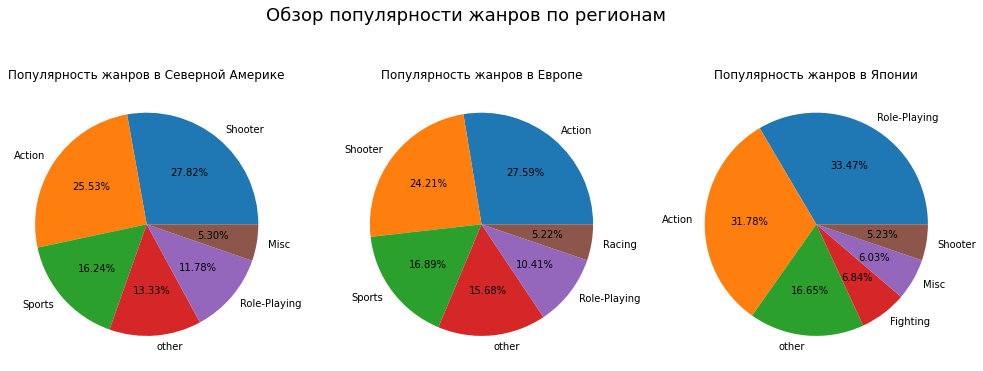

In [49]:
# построим диаграммы для визуализации полученных данных
fig, ax = plt.subplots(1, 3, figsize=(17, 17))
plt.suptitle('Обзор популярности жанров по регионам', fontsize=18, y= 0.68)
ax[0].set_title('Популярность жанров в Северной Америке')
ax[0].pie(genre_NA_sales['na_sales'], labels = genre_NA_sales['genre'], autopct='%1.2f%%')
ax[1].set_title('Популярность жанров в Европе')
ax[1].pie(genre_EU_sales['eu_sales'], labels = genre_EU_sales['genre'], autopct='%1.2f%%')
ax[2].set_title('Популярность жанров в Японии')
ax[2].pie(genre_JP_sales['jp_sales'], labels = genre_JP_sales['genre'], autopct='%1.2f%%')
plt.show()

#### Оценим влияние рейтинга ESRB на продажи в отдельном регионе

Рейтинги:  
«EC» («Early childhood») — возрастная категория 3+.  
«E» («Everyone») — возрастная категория 6+.  
«E10+» («Everyone 10 and older») — возрастная категория 10+.  
«T» («Teen») — возрастная категория 13+.  
«M» («Mature») — возрастная категория 17+.  
«AO» («Adults Only 18+») — возрастная категория 18+.  
«RP» («Rating Pending») — «Рейтинг ожидается».

In [50]:
# влияние рейтинга в Северной Америке
ESRB_NA = df_14_16.pivot_table(index = 'rating',\
                               values=['na_sales'],\
                               aggfunc=('sum')).sort_values(by='na_sales',ascending=False).reset_index()
ESRB_NA

,rating,na_sales
0,M,96.42
1,E,50.74
2,T,38.95
3,E10+,33.23


In [51]:
# влияние рейтинга в Европе
ESRB_EU = df_14_16.pivot_table(index = 'rating',\
                               values=['eu_sales'],\
                               aggfunc=('sum')).sort_values(by='eu_sales',ascending=False).reset_index()
ESRB_EU

,rating,eu_sales
0,M,93.44
1,E,58.06
2,T,34.07
3,E10+,26.16


In [52]:
# влияние рейтинга в Японии
ESRB_JP = df_14_16.pivot_table(index = 'rating',\
                               values=['jp_sales'],\
                               aggfunc=('sum')).sort_values(by='jp_sales',ascending=False).reset_index()
ESRB_JP

,rating,jp_sales
0,T,14.78
1,E,8.94
2,M,8.01
3,E10+,4.46


В Северной Америке и Европе наибольшей популярностью пользуются рейтинги M и E.  
В Японии большей популярностью пользуются рейтинги Т и E.  
Рейтинг не влияет на популярность.

#### Проверим некоторые гипотезы

**Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

H0 (нулевая гипотеза) = "Средние пользовательские рейтинги платформ Xbox One и PC равны".  
H1 (альтернативная гипотеза) = "Средние пользовательские рейтинги платформ Xbox One и PC не равны".  
Критический уровень значимости принимаем = 0.05 (нам не нужны сверхточные цифры).

In [53]:
# выполним срез по XOne и РС и удаляем строки с nan, т.к. тогда и в pvalue будет nan
XOne = df.query('platform == "XOne"')['user_score'].dropna().to_list()
PC = df.query(' platform == "PC" ')['user_score'].dropna().to_list()

In [54]:
print('Дисперсия XOne =', np.var(XOne))
print('Дисперсия PC =', np.var(PC))

Дисперсия XOne = 1.8763132659131472
Дисперсия PC = 2.3387792965660767


In [55]:
# Считаем р-значение и сравниваем с критическим уровнем значимости
alpha = 0.05
funct1 = stats.ttest_ind(XOne, PC, equal_var = False)
print('p-значение:', funct1.pvalue)
if funct1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 5.223173990163481e-05
Отвергаем нулевую гипотезу


**Средние пользовательские рейтинги платформ Xbox One и PC не равны**

**Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные**

H0 = "Средние пользовательские рейтинги жанров Action и Sports равны".  
H1 = "Средние пользовательские рейтинги жанров Action и Sports не равны".  
Критический уровень значимости принимаем = 0.05

In [56]:
# выполним срез по XOne и РС иудаляем строки с nan, т.к. тогда и в pvalue будет nan
Action = df.query('genre == "Action"')['user_score'].dropna().to_list()
Sports = df.query('genre == "Sports" ')['user_score'].dropna().to_list()

In [57]:
print('Дисперсия Action =', np.var(Action))
print('Дисперсия Sports =', np.var(Sports))

Дисперсия Action = 2.0007199154052357
Дисперсия Sports = 2.5881983321548274


In [58]:
# Считаем р-значение и сравниваем с критическим уровнем значимости
alpha = 0.05
funct2 = stats.ttest_ind(Action, Sports, equal_var = False)
print('p-значение:', funct2.pvalue)
if funct2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-значение: 0.06762240980373263
Не отвергаем нулевую гипотезу


**Средние пользовательские рейтинги жанров Action и Sports равны**

### Общий вывод

В ходе проведения анализа были выявлены следующие закономерности:  
1. Наиболее продаваемые платформы PS3, PS4, X360, 3DS, XOne;
2. Видна тенденция спада продаж по всем платформам;
3. Самый прибыльный жанр игр - Shooter;
4. Cамый выпускаемый жанр - Action;
5. Самые популярные платформы в Северной Америке X360, в Европе PS4, в Японии 3DS;  
6. Самым популярным жанром в Северной Америке и Европе является Action, в Японии Role-Playing;
7. Наиболее перспективной является платформа PS4 и XOne.  

Были проверены 2 гипотезы со следующими результатами:
1. Средние пользовательские рейтинги платформ Xbox One и PC не равны.
2. Cредние пользовательские рейтинги жанров Action и Sports равны.

**Рекламную кампанию надо планировать на PS4 и XOne.**

### Справочно

In [60]:
data_games = pd.read_csv('/datasets/games.csv')

In [61]:
data_games.columns = map(str.lower, data_games.columns)

In [62]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [63]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [64]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [65]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [66]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

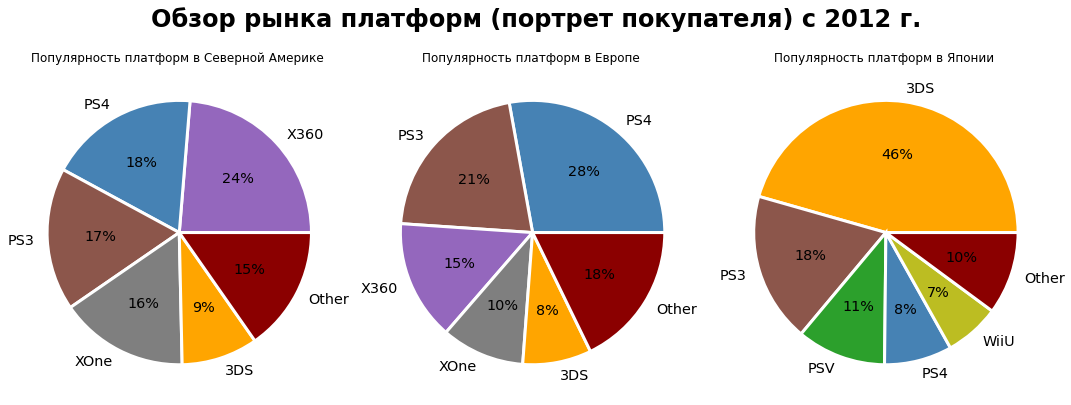

In [67]:
# check
# круги в ряд

x_year = 2012

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

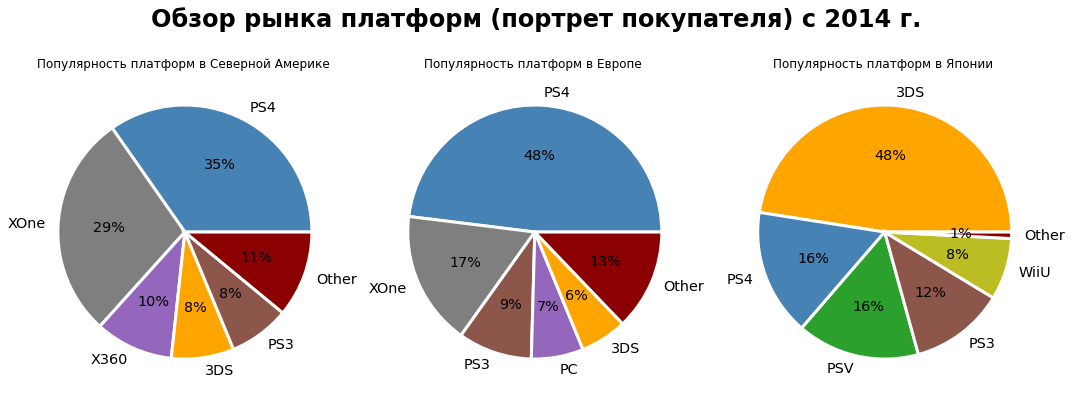

In [68]:
# check
# круги в ряд

x_year = 2014 

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

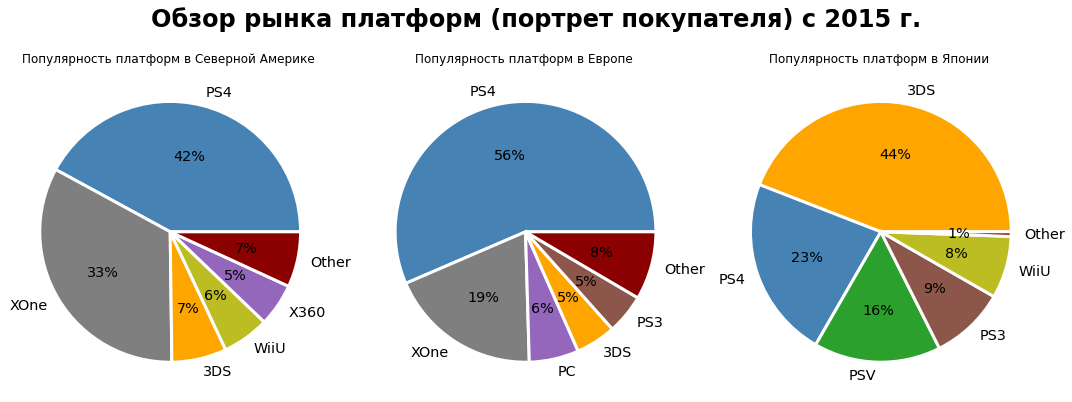

In [69]:
# check
# круги в ряд

x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])